<a href="https://colab.research.google.com/github/sachinrkp/Music-Dataset-Analysis-using-PySpark/blob/main/Music_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive

In [1]:
# Link of Dataset : https://drive.google.com/drive/folders/1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim?usp=drive_link
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [4]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=290783ab2de4ee06afaa2817be6f17c5a98bde214a1057a92d83c775ff9b9d0e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


Importing the modules

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct, size
import matplotlib.pyplot as plts

creating spark session

In [7]:
spark= SparkSession.builder.appName("spark_app").getOrCreate()

Script For generating a Sample Dataset under 100Mb out of 1Gb large csv file.

In [10]:
import pandas as pd

# Set the desired sample size in bytes (approximately 95 MB)
#sample_size_bytes = 95 * 1024 * 1024  # 95 MB in bytes

# Read the original CSV file
#listening_csv_path='/content/drive/MyDrive/dataset/listenings.csv'
#df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)


# Sample a single row to estimate its size
#sample_row = df.limit(1).select(struct([col(c) for c in df.columns])).collect()[0][0]
#row_size_bytes = sample_row.__sizeof__()

# Calculate the number of rows to sample
#sample_size_rows = int(sample_size_bytes / row_size_bytes)

# Sample the DataFrame
#sampled_df = df.limit(sample_size_rows)

# Write the sampled DataFrame to a new CSV file
#sampled_df.write.csv('listenings_sampled_file.csv', header=True, mode='overwrite')




# Task 2 :
importing the *Listenings.csv* file:

In [11]:
listening_csv_path='Listenings_Sample_dataset.csv'
listening_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)

let's check the data:

In [12]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [13]:
listening_df=listening_df.drop('date')

drop the null rows:

In [14]:
listening_df=listening_df.na.drop()

let's check the dataset again:

In [15]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [16]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [17]:
shape=(listening_df.count(),len(listening_df.columns))
print(shape)

(82535, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [18]:
q0=listening_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [19]:
q1=listening_df.select('*').filter(listening_df.artist=='Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [20]:
q2=listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('Count')).orderBy(desc('Count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|Count|
+---------------+-----+
|          0rdos|   36|
|    Abbi-Cooper|   21|
|          37sac|   20|
|     abcdefiona|   19|
|     aakashnaik|   11|
|aaaandreaugusto|   11|
|         69dude|   11|
|         abbiii|   11|
|    AbbaJabba18|   10|
|      Aberlad93|   10|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [21]:
q3= listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('Count')).orderBy(desc('Count')).limit(10)
q3.show()

+--------------------+--------------------+-----+
|              artist|               track|Count|
+--------------------+--------------------+-----+
|         Pieta Brown|            Receiver|   85|
|                  Ma|What Have They Do...|   76|
|              Pt III|   Read All About It|   76|
|        Caro Emerald|            That Man|   49|
|       The Jackson 5|     I Want You Back|   48|
|             Beyoncé|                Blue|   46|
|           Lady Gaga|               Judas|   38|
|               Usher|              Climax|   37|
|                Eels|Novocaine for the...|   37|
|Selena Gomez & th...| A Year Without Rain|   37|
+--------------------+--------------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [22]:
q4=listening_df.select('artist','track').filter(listening_df.artist=='Rihanna').groupby('artist','track').agg(count('*').alias('Count')).orderBy(desc('Count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|Count|
+-------+--------------------+-----+
|Rihanna|                Work|   14|
|Rihanna|      What's My Name|   13|
|Rihanna|We Found Love (fe...|   12|
|Rihanna| Where Have You Been|   10|
|Rihanna|          You Da One|   10|
|Rihanna|            Diamonds|    8|
|Rihanna|           Desperado|    7|
|Rihanna|Hate That I Love You|    6|
|Rihanna|         James Joint|    5|
|Rihanna|                 S&M|    5|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [23]:
q5=listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('Count')).orderBy(desc('Count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|Count|
+--------------------+--------------------+-----+
|            Gorillaz|          Demon Days|  306|
|           Radiohead|         OK Computer|  170|
|          Kanye West|   The Life of Pablo|  149|
|            The 1975|            The 1975|  138|
|         Royal Blood|         Royal Blood|  135|
|Florence + the Ma...|               Lungs|  131|
|           The Enemy|We'll Live and Di...|  120|
|           TesseracT|                 One|  116|
|       The Postmarks|Memoirs At The En...|  113|
|         Pieta Brown|     Paradise Outlaw|  111|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [24]:
genre_csv_path='genre.csv'
genre_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

let's check the data

In [25]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [26]:
data=listening_df.join(genre_df,how='inner',on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [27]:
q6=data.select('user_id').filter(data.genre=='pop').groupby('user_id').agg(count('*').alias('Count')).orderBy(desc('Count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|Count|
+---------------+-----+
|        01Green|  496|
|         170606|  169|
|  aaronmbaldwin|  157|
|  Abbie-Rebecca|  155|
|      1337atron|  152|
|          37sac|  152|
|     aaaaajtobb|  142|
|aaaandreaugusto|  129|
|         abbiii|  129|
|       99antsim|  126|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [28]:
q7=data.select('genre').groupby('genre').agg(count('*').alias('Count')).orderBy(desc('Count')).limit(10)
q7.show()

+----------+-----+
|     genre|Count|
+----------+-----+
|      rock|15728|
|       pop|10263|
|electronic| 3629|
|   hip hop| 3280|
|indie rock| 3151|
|       r&b| 2674|
|      folk| 2279|
|      punk| 2232|
|      jazz| 1567|
|     metal| 1391|
+----------+-----+



# Task 5:
**Query #8**

find out each user favourite genre

In [29]:
q8_1=data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('Count')).orderBy('user_id')
q8_1.show()

+-----------+--------------------+-----+
|    user_id|               genre|Count|
+-----------+--------------------+-----+
|000Silenced|       Sticky Fingaz|    2|
|000Silenced|                soul|    2|
|000Silenced|           uk garage|    9|
|000Silenced|             50 Cent|    2|
|000Silenced| Royce 5'9 & Mr P...|    2|
|000Silenced|                 pop|    9|
|000Silenced|                Eboi|    1|
|000Silenced|       High Contrast|    1|
|000Silenced|               Kelis|    3|
|000Silenced|             new age|    1|
|000Silenced|               Ciara|    1|
|000Silenced|           Them & Us|    1|
|000Silenced| Ariana Grande & ...|    2|
|000Silenced|        Ruff Driverz|    3|
|000Silenced|             electro|    6|
|000Silenced|               metal|    2|
|000Silenced|          electronic|   10|
|000Silenced|         electronica|    4|
|000Silenced|               Zomby|    1|
|000Silenced| Nicki Minaj & Ar...|    2|
+-----------+--------------------+-----+
only showing top

In [30]:
from pyspark.sql.functions import struct

In [31]:
q8_2=q8_1.groupby('user_id').agg(max(struct(col('Count'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q8_2.show()

+---------------+-------------+
|        user_id|        genre|
+---------------+-------------+
|    000Silenced|drum and bass|
|         004545|         rock|
|        00Lemon|         rock|
|00TrompeLeMonde|         jazz|
|        00bob00|    classical|
|      00fieldsy|         rock|
|        00jamez|   indie rock|
|    00williamsj|      country|
|    00williamsl|          pop|
|        01Green|          pop|
|         01dela|     pop punk|
|     01higginsr|      hip hop|
|     01kaputnik|         rock|
|  01rwsouthgate|         rock|
|       01smicha|         rock|
|      01srainey|          pop|
|     02styles91|         folk|
|      03swalker|         rock|
|        0502008|          pop|
|        0503611|         rock|
+---------------+-------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [32]:
q9=genre_df.select('genre').filter((col('genre')=='pop')| (col('genre')=='rock')|(col('genre')=='metal')|(col('genre')=='hip hop')).groupby('genre').agg(count('genre').alias('Count'))
q9.show()

+-------+-----+
|  genre|Count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [33]:
q9_list=q9.collect()

In [34]:
labels=[row['genre'] for row in q9_list]
counts=[row['Count'] for row in q9_list]

In [35]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

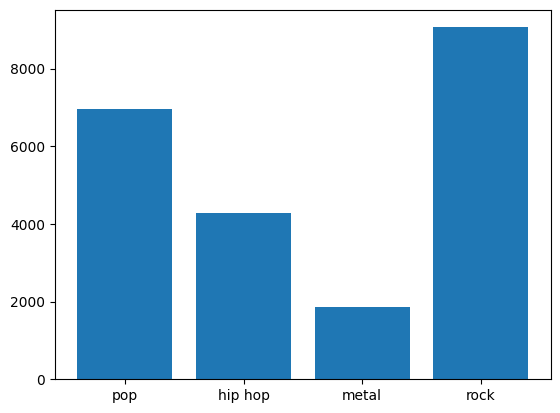

In [36]:
plts.bar(labels,counts)